In [15]:
import csv
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
df = pd.read_csv("../heart_disease_health_indicators_BRFSS2015.csv")


In [2]:
X=df.drop(['HeartDiseaseorAttack','Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost','HighChol', 'CholCheck'],axis=1)
y = df['HeartDiseaseorAttack']
pca = PCA(n_components =3)
pca.fit(X)
components = pca.fit_transform(X)


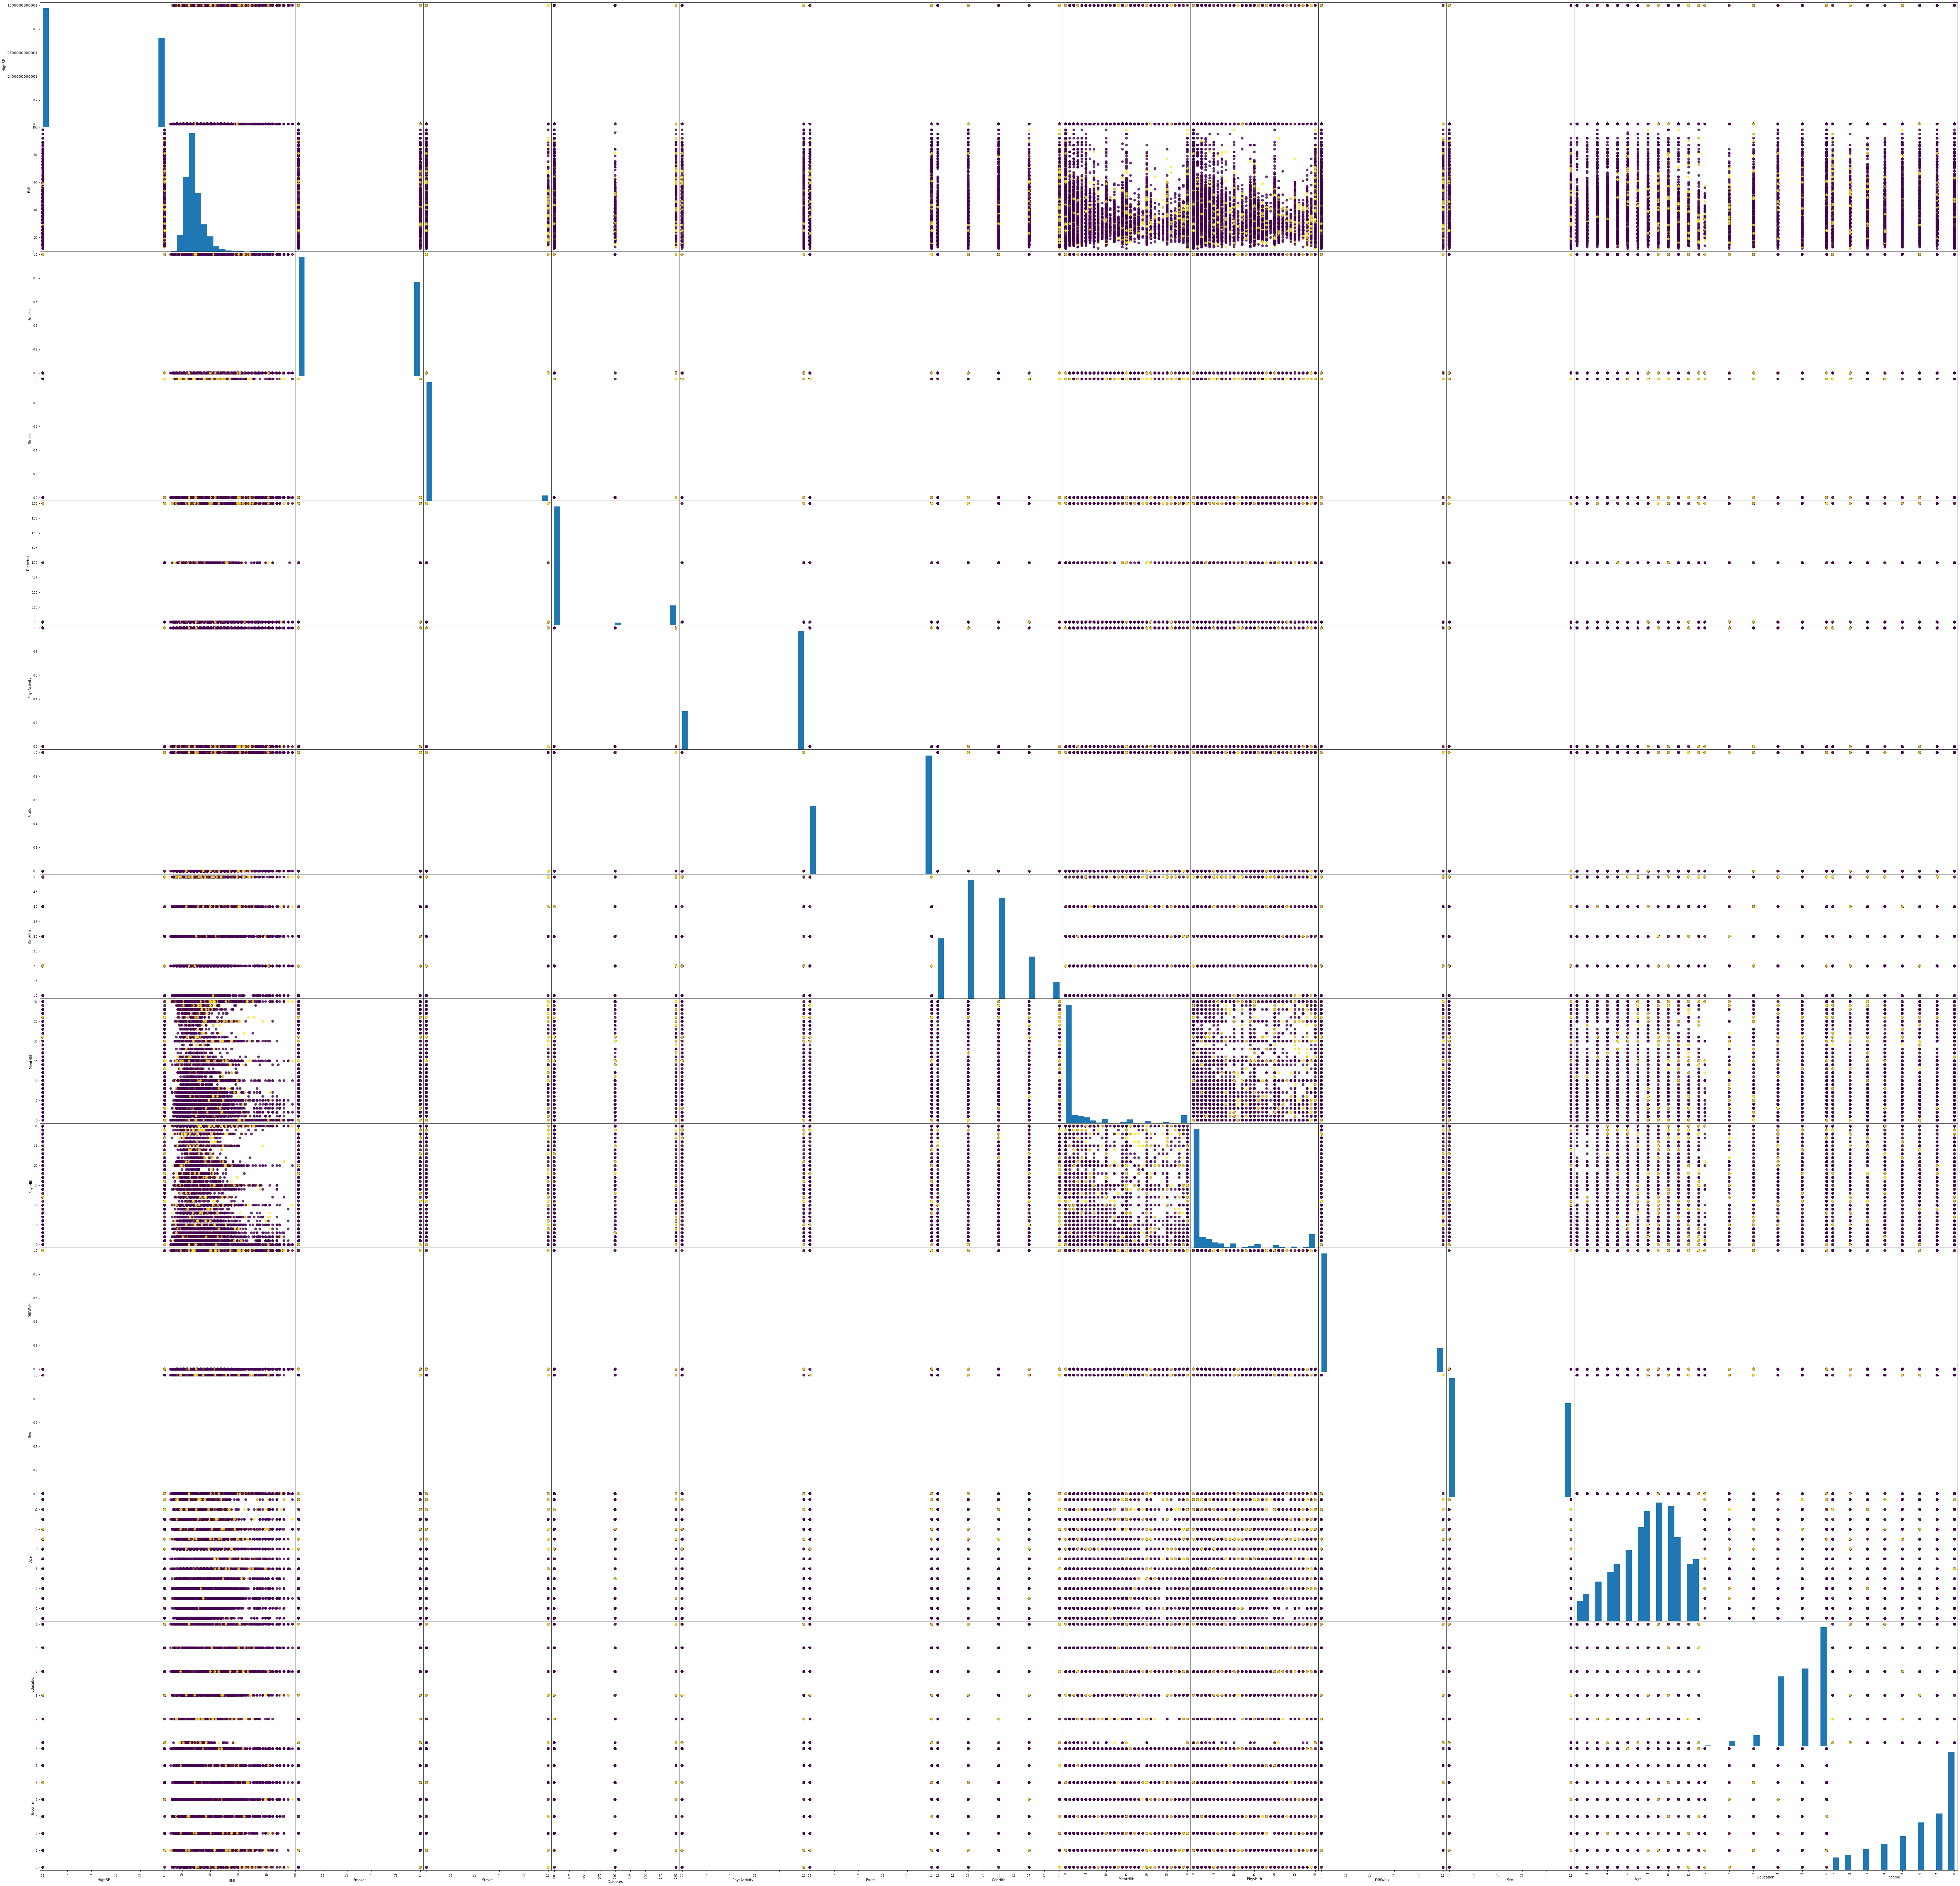

In [3]:
data_fr = pd.DataFrame(X,columns = X.columns )
from pandas.plotting import scatter_matrix
grr = scatter_matrix(data_fr,c=y,figsize=(100,100),marker = 'o',hist_kwds={'bins':20},s=60,alpha=0.8)

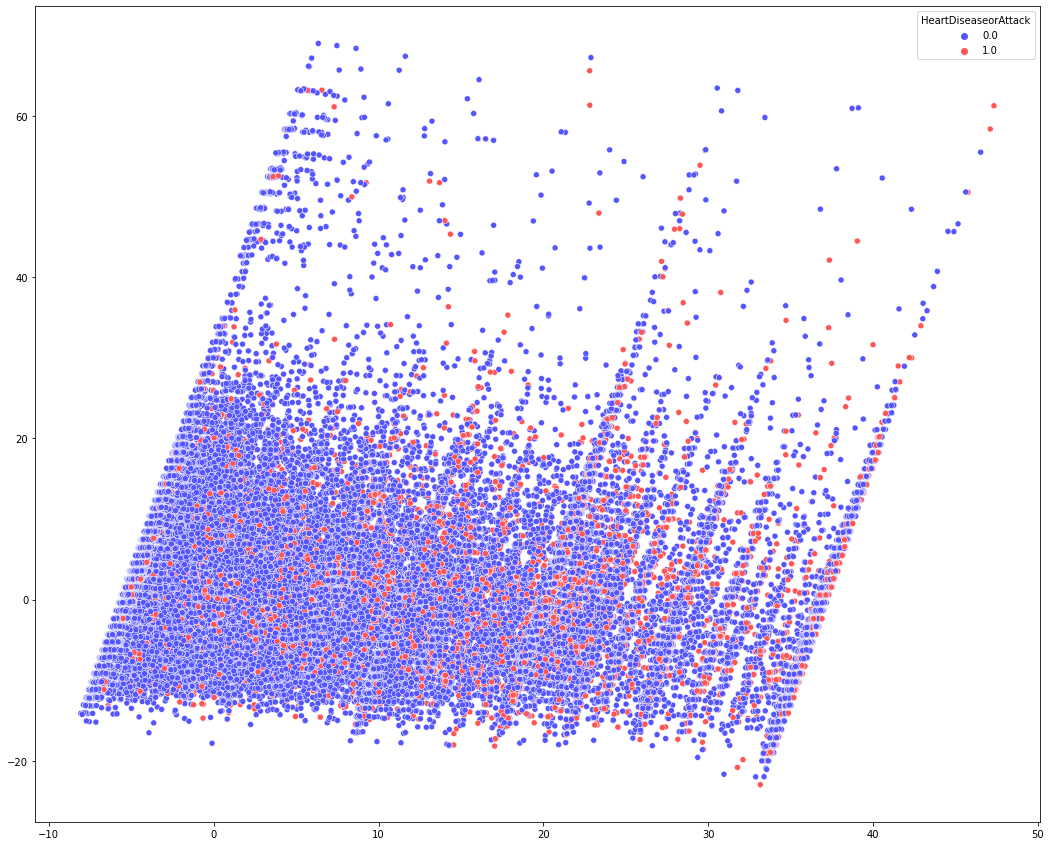

In [4]:
pca = PCA(n_components=2)
xtr_pca = pca.fit_transform(X)
plt.figure(figsize=(18,15))
sns.scatterplot(x=xtr_pca[:,0], y=xtr_pca[:,1], hue=y, palette='seismic')
plt.show()

In [12]:
X=df.drop(['HeartDiseaseorAttack'],axis=1)
y = df['HeartDiseaseorAttack']

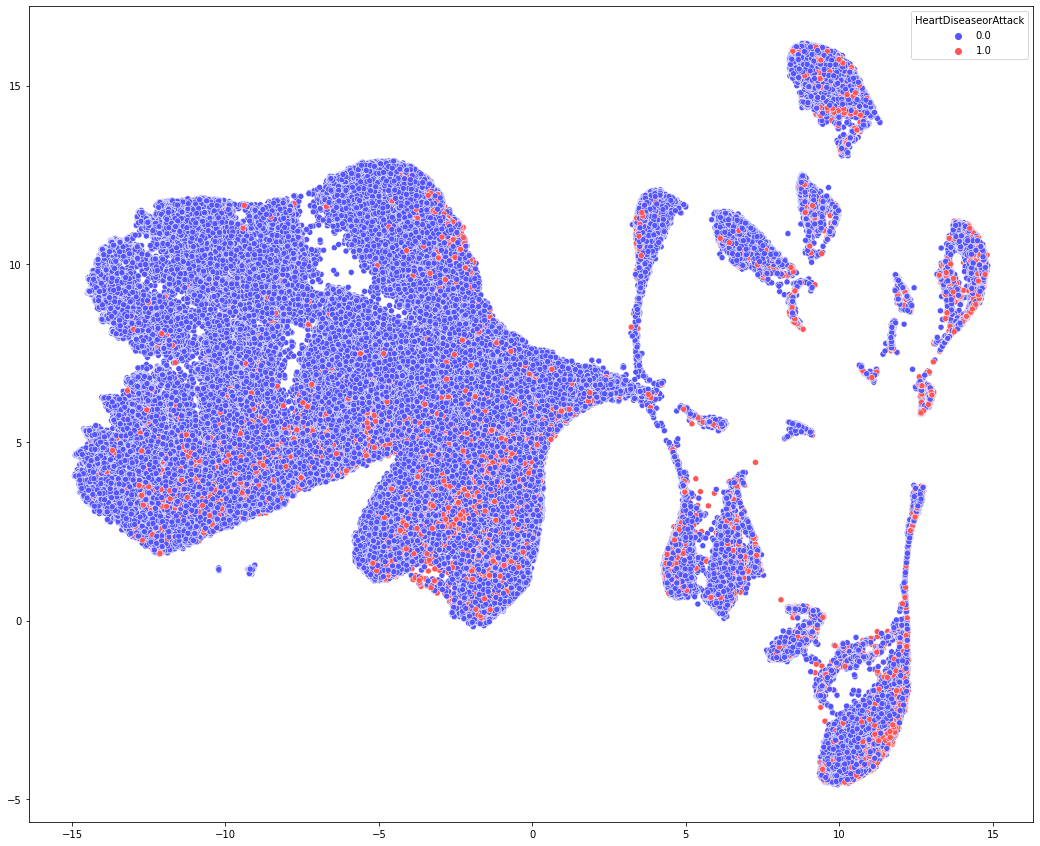

In [8]:
import umap
reducer = umap.UMAP()
reducer.fit(X)
xtr_umap = reducer.transform(X)
plt.figure(figsize=(18,15))
sns.scatterplot(x=xtr_umap[:,0], y=xtr_umap[:,1], hue=y, palette='seismic')
plt.show()

In [9]:
#UMAP dla danych treningowych oversamplowanych

In [20]:
X=df.drop(['HeartDiseaseorAttack'],axis=1)
y = df['HeartDiseaseorAttack']
sm = SMOTE(random_state=42)
xtrain,x_test,ytrain,y_test = train_test_split(X,y,random_state = 0,stratify = y)

x_train, y_train = sm.fit_resample(xtrain, ytrain)

In [ ]:
reducer = umap.UMAP()
reducer.fit(x_train)
xtr_umap = reducer.transform(x_train)
plt.figure(figsize=(18,15))
sns.scatterplot(x=xtr_umap[:,0], y=xtr_umap[:,1], hue=y_train, palette='seismic')
plt.show()

In [23]:
xtr_umap

array([[15.554066 ,  5.3986835],
       [ 8.597246 ,  0.8478037],
       [-3.8899093, 10.047806 ],
       ...,
       [12.166348 ,  5.131794 ],
       [-0.5529858, -5.921835 ],
       [-5.1533384, 11.283589 ]], dtype=float32)